# Track Lengths

Here we look at the number of EEPs in each of the available model tracks. This is useful for debugging, such as when a track terminates before you expect it to, or catching instances when the EEP identification is wrong.

We'll also look at an example visualizing properties of the full tracks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kiauhoku as kh

## YREC

### EEP tracks

In [2]:
# load track
yrec = kh.load_eep_grid("yrec")

# measure lengths
lengths = yrec.get_eep_track_lengths()
lengths.columns = ["length"]
lvals = lengths.values.reshape(-1, 4).T

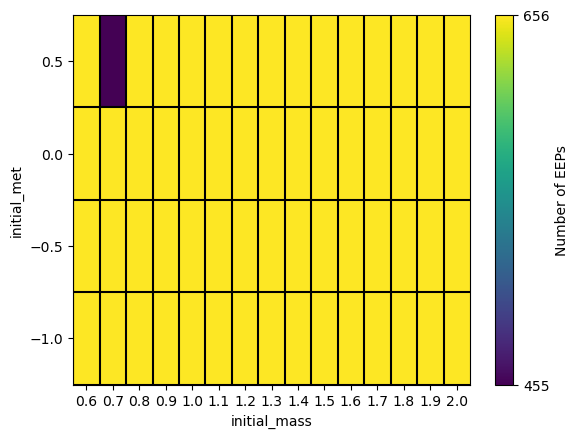

In [3]:
# evaluate tick and grid line positions
def get_boundaries(grid, level):
    return grid.index.get_level_values(level).drop_duplicates()

xlabel = "initial_mass"
ylabel = "initial_met"
xticks = get_boundaries(yrec, xlabel)
yticks = get_boundaries(yrec, ylabel)
delta_x = np.median(np.diff(xticks))
delta_y = np.median(np.diff(yticks))
xmin = xticks[0] - delta_x/2
xmax = xticks[-1] + delta_x/2
ymin = yticks[0] - delta_y/2
ymax = yticks[-1] + delta_y/2

# plot lengths
%matplotlib inline

kw = {"color": "k"}

plt.imshow(lvals, extent=(xmin, xmax, ymin, ymax), origin="lower", aspect="auto")
plt.xticks(xticks)
plt.yticks(yticks)

plt.vlines(xticks-delta_x/2, ymin=ymin, ymax=ymax, **kw)
plt.hlines(yticks-delta_y/2, xmin=xmin, xmax=xmax, **kw)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.colorbar(ticks=list(set(lvals.flatten())), label="Number of EEPs")

According to this graph, all but one of the YREC tracks make it to the tip of the red giant branch (TRGB). The one that terminates early has a mass of 0.7 Msun and metallicity of +0.5 dex. We can plot this track with its neighbors overtop of the full tracks to see what happens.

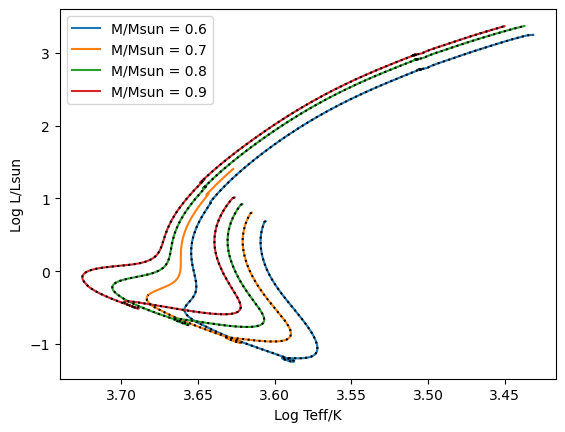

In [4]:
# load full tracks
yrec_full = kh.load_full_grid("yrec")

%matplotlib inline
met = 0.5
masses = [0.6, 0.7, 0.8, 0.9]

for i, m in enumerate(masses):
    color = f"C{i}"
    plt.plot("Log Teff(K)", "L/Lsun", data=yrec_full.loc[m, met], label=f"M/Msun = {m:3.1f}", color=color)
    plt.plot("Log Teff(K)", "L/Lsun", "k:", data=yrec.loc[m, met], label="_")

plt.gca().invert_xaxis()
plt.xlabel("Log Teff/K")
plt.ylabel("Log L/Lsun")
plt.legend();

The full track (solid line) makes it to the RGB bump, but not to the tip like its neighbors. As a result, the EEP track (black dotted line) terminates at the last available primary EEP, the terminal-age main sequence (TAMS).

### Full tracks

Since we've loaded the full tracks anyway, let's make a similar grid-like plot with the tracks' final logg values.

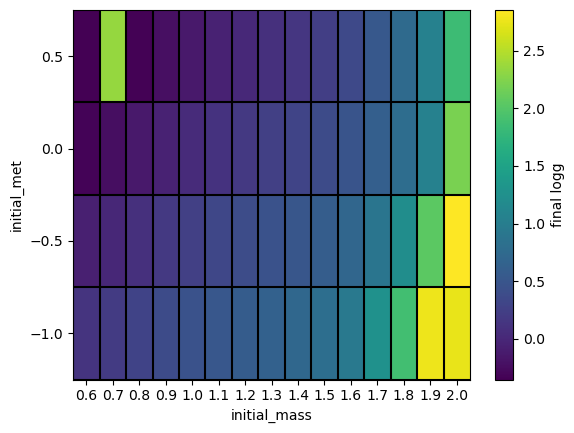

In [5]:
def get_last_values(grid, label):
    idx = grid.index.droplevel(-1).drop_duplicates()
    values = [grid.loc[i, label].iloc[-1] for i in idx]
    values = pd.DataFrame(values, index=idx, columns=[label])
    return values


%matplotlib inline
label = "logg"
values = get_last_values(yrec_full, label)
lvals = values.values.reshape(-1, 4).T

kw = {"color": "k"}

plt.imshow(lvals, extent=(xmin, xmax, ymin, ymax), origin="lower", aspect="auto")
plt.xticks(xticks)
plt.yticks(yticks)

plt.vlines(xticks-delta_x/2, ymin=ymin, ymax=ymax, **kw)
plt.hlines(yticks-delta_y/2, xmin=xmin, xmax=xmax, **kw)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.colorbar(label=f"final {label}");

That pesky 0.7-Msun track shows up in this view as well, terminating at a much higher logg than its neighbors.

These kinds of plots help us identify when things are going wrong with our tracks!